In [1]:
# importing Libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import matplotlib.patches as patches
# from scipy import special
# from scipy.optimize import curve_fit
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
def analytic_solution(A,B,omega,t):
    
    return [A*np.sin(omega*t)+B*np.cos(omega*t),omega*A*np.cos(omega*t)-omega*B*np.sin(omega*t)]

In [3]:
def Forward_Euler_approximation(q_initial,p_initial,delta,omega,num_iteration):
    
    initial_condition = np.array([q_initial,p_initial])
    evolution_map = np.array([[1,delta/4.0],[0,1]])@np.array([[1,0],[-(delta/2.0)*omega**2,1]])@np.array([[1,delta/4.0],[0,1]])
    output = np.dot(np.linalg.matrix_power(evolution_map, num_iteration), initial_condition)
    
    return output

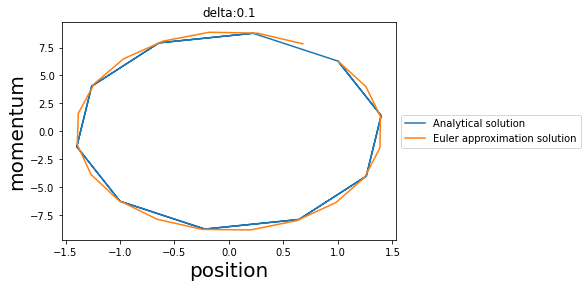

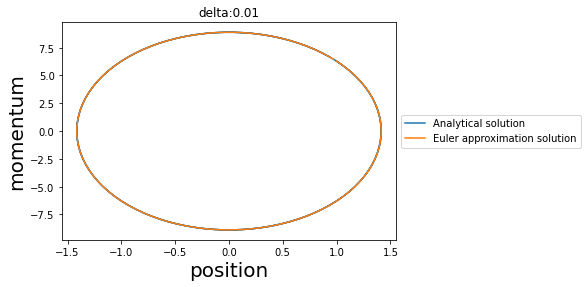

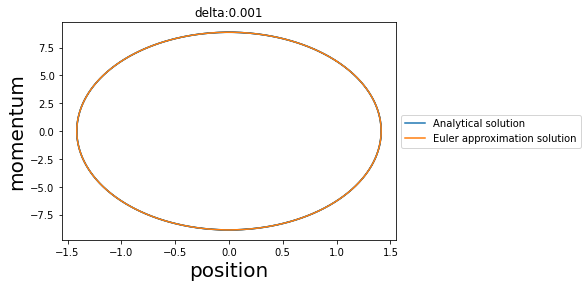

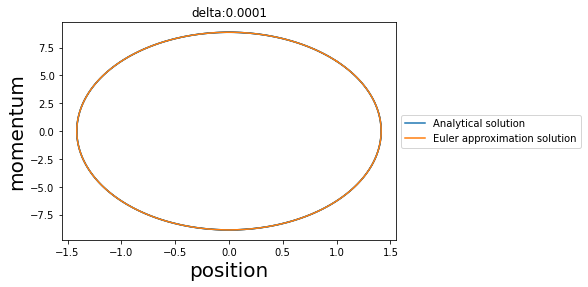

In [4]:
for delta in [0.1,0.01,0.001,0.0001]:
    
    end_time = 2
    n_end = int((end_time/delta))
    tt = np.arange(0.0, end_time, delta)
    ana_sol_1 = np.asarray([analytic_solution(1.0,1.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx = np.asarray([Forward_Euler_approximation(ana_sol_1[0][0],ana_sol_1[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    #plotting out some gaussian fit
    fig, axes = plt.subplots(1,1)

    axes.plot(ana_sol_1[:,0] ,ana_sol_1[:,1],label='Analytical solution')

    
#     axes.plot(tt,euler_approx[:,1]**2/2+0.5*((2.0*np.pi)**2)*euler_approx[:,0]**2,label='Euler approximation solution energy')
    axes.plot(euler_approx[:,0] ,euler_approx[:,1],label='Euler approximation solution')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes.set_xlabel(f'position', fontsize=20)
    axes.set_ylabel(f'momentum', fontsize=20);
    plt.title(f'delta:{delta}')